# Implement mean-shift algorithm (For 2D data)

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate sample data (to check algorithm correctly)

### Generate circule dataset

No handles with labels found to put in legend.


(32, 2)


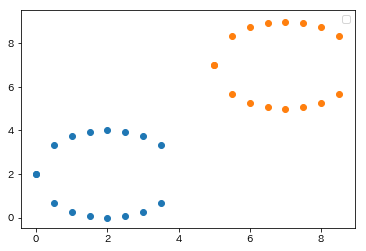

In [2]:
x_1 = np.arange(0, 4, 0.5)
x_2 = np.arange(5, 9, 0.5)

y_1_top = 2 + (4 - (x_1 - 2) ** 2) ** 0.5
y_2_top = 7 + (4 - (x_2 - 7) ** 2) ** 0.5

y_1_bottom = 2 - (4 - (x_1 - 2) ** 2) ** 0.5
y_2_bottom = 7 - (4 - (x_2 - 7) ** 2) ** 0.5

x_1_data = np.concatenate([x_1, x_1])
x_2_data = np.concatenate([x_2, x_2])

y_1_data = np.concatenate([y_1_top, y_1_bottom])
y_2_data = np.concatenate([y_2_top, y_2_bottom])

plt.figure()
plt.scatter(x_1_data, y_1_data)
plt.scatter(x_2_data, y_2_data)
plt.legend()

x_all = np.concatenate([x_1_data, x_2_data])
y_all = np.concatenate([y_1_data, y_2_data])

circule_data = np.vstack([[x_all], [y_all]]).T
print(circule_data.shape)

### Genarate rectangle dataset

No handles with labels found to put in legend.


(72, 2)


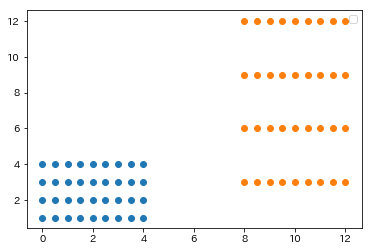

In [3]:
rectangle_x_1_base = np.arange(0, 4.5, 0.5)
rectangle_x_1 = np.concatenate([rectangle_x_1_base for _ in range(1, 5)])
rectangle_y_1_base = np.ones(rectangle_x_1_base.shape[0])
rectangle_y_1 = np.concatenate([rectangle_y_1_base *scale for scale in range(1, 5)])

rectangle_x_2_base = np.arange(8, 12.5, 0.5)
rectangle_x_2 = np.concatenate([rectangle_x_2_base for _ in range(1, 5)])
rectangle_y_2_base = np.ones(rectangle_x_2_base.shape[0]) * 3
rectangle_y_2 = np.concatenate([rectangle_y_2_base *scale for scale in range(1, 5)])

plt.figure()
plt.scatter(rectangle_x_1, rectangle_y_1)
plt.scatter(rectangle_x_2, rectangle_y_2)
plt.legend()

rectangle_x_all = np.concatenate([rectangle_x_1, rectangle_x_2])
rectangle_y_all = np.concatenate([rectangle_y_1, rectangle_y_2])
rectangle_data = np.vstack([[rectangle_x_all], [rectangle_y_all]]).T
print(rectangle_data.shape)

### Generate iris dataset

['Setosa' 'Versicolor' 'Virginica']
Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


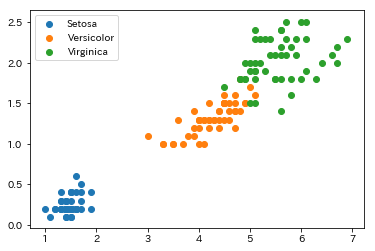

In [4]:
from sklearn.datasets import load_iris
iris_df = pd.read_csv(filepath_or_buffer="iris.csv", encoding="ms932", sep=",")
print(iris_df["variety"].unique())
print(iris_df.columns)

plt.scatter(iris_df[iris_df["variety"] == "Setosa"]["petal.length"], iris_df[iris_df["variety"] == "Setosa"]["petal.width"], label="Setosa")
plt.scatter(iris_df[iris_df["variety"] == "Versicolor"]["petal.length"], iris_df[iris_df["variety"] == "Versicolor"]["petal.width"], label="Versicolor")
plt.scatter(iris_df[iris_df["variety"] == "Virginica"]["petal.length"], iris_df[iris_df["variety"] == "Virginica"]["petal.width"], label="Virginica")
plt.legend()

iris_data = iris_df.loc[:,['petal.length','petal.width']].values

## Define mean-shift class

In [29]:
# For scaling
from sklearn import preprocessing

class MeanShift:
    
    #     initialization of kmeans class
    def __init__(self, kernel_size):
                
        #         define color map to plot data (if cluster numbers > color number, we can use same color)
        self.color_map = ["r", "g", "b", "c", "m", "y", "k", "w"]
        
        self.kernel_size = kernel_size
        
    #         set input data
    def set_datasets(self, sample_data):

        self.sample_num = sample_data.shape[0]
        self.sample_features = sample_data.shape[1]
        
        #         scale input data
        min_max_scaler = preprocessing.MinMaxScaler()
        sample_data_min_max = min_max_scaler.fit_transform(sample_data)
        self.sample_data = sample_data_min_max

    
    #     training input data
    def fit(self, sample_data):
        
        #         set input data
        self.set_datasets(sample_data)
        
        #         define matrix to save result data
        self.clustering_array = np.zeros((self.sample_num, self.sample_num), dtype=np.bool)
        
        for sample_idx in range(self.sample_num):
            self.each_point_search(sample_idx)
        
    #     serching for each point
    def each_point_search(self, sample_idx):
        
        #         get coordinates of the initial point
        initial_sample_coord = self.sample_data[sample_idx, :]
        
        #         flag to judgment initial search and covergence
        initial_flag = True
        
        while True:
            
#             visualize
#             self.visualize_data(initial_sample_coord)
            
#             get indexs within circule define by kernel size and average points of them
            max_x, min_x = initial_sample_coord[0] + self.kernel_size, initial_sample_coord[0] - self.kernel_size
            max_y, min_y = initial_sample_coord[1] + self.kernel_size, initial_sample_coord[1] - self.kernel_size
            within_circule_bool = np.where((max_x > self.sample_data[:, 0] ) & (min_x < self.sample_data[:, 0]) &
                                            (max_y > self.sample_data[:, 1] ) & (min_y < self.sample_data[:, 1]),
                                            True, False)
            within_circule_point_coord = self.sample_data[within_circule_bool]
            within_circule_point_coord_mean = np.mean(within_circule_point_coord, axis=0)
            
#             収束判定
            if initial_flag:
                initial_flag = False
                before_within_circule_bool = within_circule_bool
            else:
                compare_within_circile_bool = before_within_circule_bool ^ within_circule_bool
                before_within_circule_bool = within_circule_bool
                
#                 収束したら break する
                if np.sum(compare_within_circile_bool) == 0:
                    self.clustering_array[sample_idx, :] = within_circule_bool
                    break
            
#             update centoid points of circule
            initial_sample_coord = within_circule_point_coord_mean
                    
    #     visualize clustering result of each iteration
    def visualize_data(self, centroid_coord):
        
        figure, axes = plt.subplots()
        draw_circle = plt.Circle((centroid_coord[0], centroid_coord[1]), self.kernel_size, fill=False)
        
        axes.add_artist(draw_circle)
        axes.scatter(centroid_coord[0], centroid_coord[-1], marker="x", s=100)
        axes.scatter(self.sample_data[:, 0], self.sample_data[:, 1], alpha=0.2)
        axes.legend()
        
    def predict(self):
        
        #         Defone array to save clustered points infomations
        self.clustered_array = np.zeros((1, self.sample_num), dtype=np.bool)
        
        #         define cluster number 
        cluster_number = 0
        
        #         check each sample point result
        for sample_idx in range(self.sample_num):
            
            #             check whether the cluster is ploted or not
            compare_clusterd_array = self.clustered_array ^ self.clustering_array[sample_idx, :]
            compare_clusterd_array_sum = np.sum(compare_clusterd_array, axis=1)
            
           
            
            #             if the cluster have ploted
            if np.any(compare_clusterd_array_sum == 0):
                pass

            else:
                
                #                 find points which are convergenced the same point
                points_same_convergemce_bool = np.all(self.clustering_array == self.clustering_array[sample_idx, :], axis=1)
            
                #                 plot clustering sample
                plt.scatter(self.sample_data[points_same_convergemce_bool][:, 0],
                            self.sample_data[points_same_convergemce_bool][:, 1],
                            label="Cluster:{}".format(cluster_number + 1), color=self.color_map[cluster_number % 8], 
                            alpha=0.3)
                
                plt.xlim(-0.1, 1.1)
                plt.ylim(-0.1, 1.1)
                plt.legend()
                
                #                 save clustered sample data infomation
                self.clustered_array = np.vstack([self.clustered_array, self.clustering_array[sample_idx, :]])
                
                #                 update cluster nunmber
                cluster_number += 1

## Execute mean-shift algorithm using datasets which you want to test  
(Circle, Rectangle, Iris)

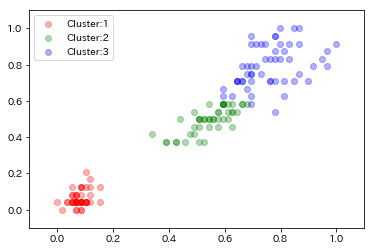

In [32]:
# set some parameters
sample_data = iris_data
kernel_size = 0.3

# make instance of MeanShift class
mean_shift = MeanShift(kernel_size)

# train dataset
mean_shift.fit(sample_data)

# cluster dataset
mean_shift.predict()